<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [4]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [6]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [7]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

print(train.shape, test.shape)


(5282, 20) (1761, 19)


In [8]:
# YOUR CODE
#выводим 5 радномных строк
from random import randint
for i in range(5):
    print(train.values[randint(1, train.shape[0]-1)])

#Берем конкатенацию всех ответов на "есть ли NaN" и получаем 0, следовательно, NaN-ов в датасете нет
print("nan-ов в датасете: ", sum([sum(i) for i in train.isna().values]))
#print(data.info())
#print(data.dropna().shape)
test.isna().sum()


[45 51.0 '2264.5' 'Female' 0 'Yes' 'Yes' 'No' 'No phone service' 'DSL'
 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'One year' 'No'
 'Bank transfer (automatic)' 0]
[10 85.55 '851.75' 'Male' 1 'Yes' 'No' 'Yes' 'Yes' 'Fiber optic' 'No' 'No'
 'No' 'No' 'No' 'Yes' 'Month-to-month' 'No' 'Electronic check' 1]
[58 64.9 '3795.45' 'Female' 0 'No' 'No' 'Yes' 'No' 'DSL' 'Yes' 'Yes' 'Yes'
 'Yes' 'No' 'No' 'Two year' 'Yes' 'Credit card (automatic)' 0]
[23 44.95 '996.85' 'Female' 0 'No' 'No' 'No' 'No phone service' 'DSL' 'No'
 'No' 'No' 'No' 'Yes' 'Yes' 'Month-to-month' 'Yes' 'Electronic check' 0]
[9 70.05 '564.4' 'Male' 0 'Yes' 'No' 'Yes' 'No' 'DSL' 'No' 'No' 'Yes' 'No'
 'Yes' 'Yes' 'Month-to-month' 'Yes' 'Mailed check' 0]
nan-ов в датасете:  0


ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### Для численных призанков постройте гистограмму

In [9]:
#проверим соответствие типов данных
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
ClientPeriod                5282 non-null int64
MonthlySpending             5282 non-null float64
TotalSpent                  5282 non-null object
Sex                         5282 non-null object
IsSeniorCitizen             5282 non-null int64
HasPartner                  5282 non-null object
HasChild                    5282 non-null object
HasPhoneService             5282 non-null object
HasMultiplePhoneNumbers     5282 non-null object
HasInternetService          5282 non-null object
HasOnlineSecurityService    5282 non-null object
HasOnlineBackup             5282 non-null object
HasDeviceProtection         5282 non-null object
HasTechSupportAccess        5282 non-null object
HasOnlineTV                 5282 non-null object
HasMovieSubscription        5282 non-null object
HasContractPhone            5282 non-null object
IsBillingPaperless          5282 non-null object
PaymentMetho

In [10]:
#в TotalSpend есть пропущенные значения ' ' заменим их на 0
train.TotalSpent = pd.to_numeric(train.TotalSpent.str.replace(' ', '0'), downcast='float')
train.TotalSpent.astype(float)

0       1026.349976
1       1872.199951
2         75.900002
3       2570.000000
4       6758.450195
           ...     
5277      82.150002
5278    2188.449951
5279      55.049999
5280    2215.250000
5281    1375.599976
Name: TotalSpent, Length: 5282, dtype: float64

In [11]:
#аналогично в тестовой выборке
test.TotalSpent = pd.to_numeric(test.TotalSpent.str.replace(' ', '0'), downcast='float')
test.TotalSpent.astype(float)

0       2386.850098
1       3004.149902
2        684.849976
3       4868.399902
4       1389.599976
           ...     
1756    7555.000000
1757     272.350006
1758     171.449997
1759    1620.800049
1760    4566.500000
Name: TotalSpent, Length: 1761, dtype: float64

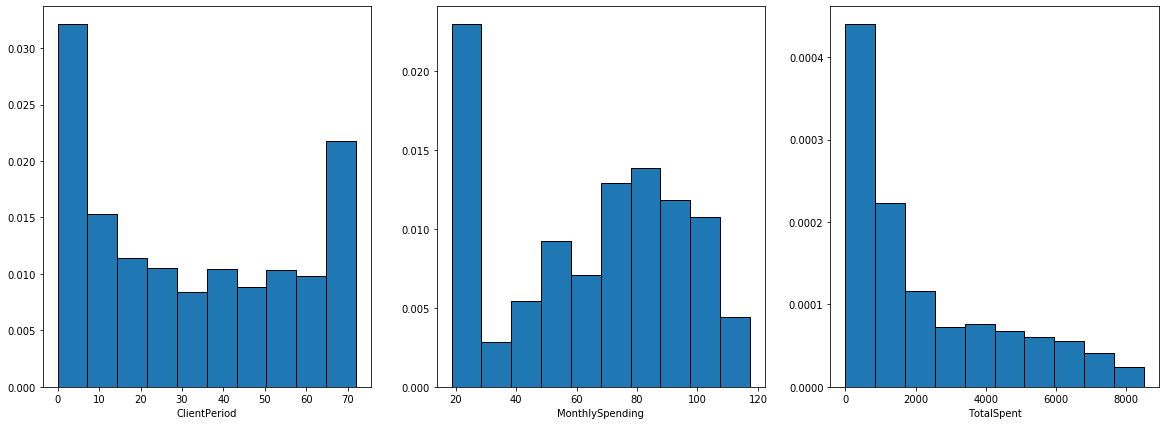

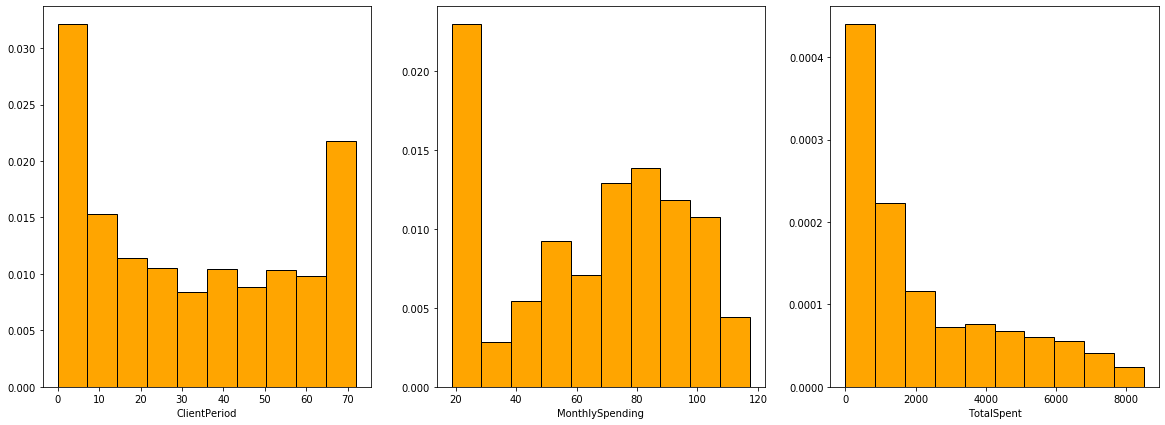

In [12]:
# для train выборки
fig = plt.figure(figsize=(20, 7))

for i, col in enumerate(num_cols):
    ax = plt.subplot(1,len(num_cols),i+1)
    ax.hist(test[num_cols[i]], label=col, edgecolor='black', density=True)
    plt.xlabel(num_cols[i])
plt.show()
# для test выборки
fig = plt.figure(figsize=(20, 7))

for i, col in enumerate(num_cols):
    ax = plt.subplot(1,len(num_cols),i+1)
    ax.hist(test[num_cols[i]], label=col, edgecolor='black', density=True, color='orange')
    plt.xlabel(num_cols[i])
plt.show()

# видно, что распределение одинаковое

### Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)*

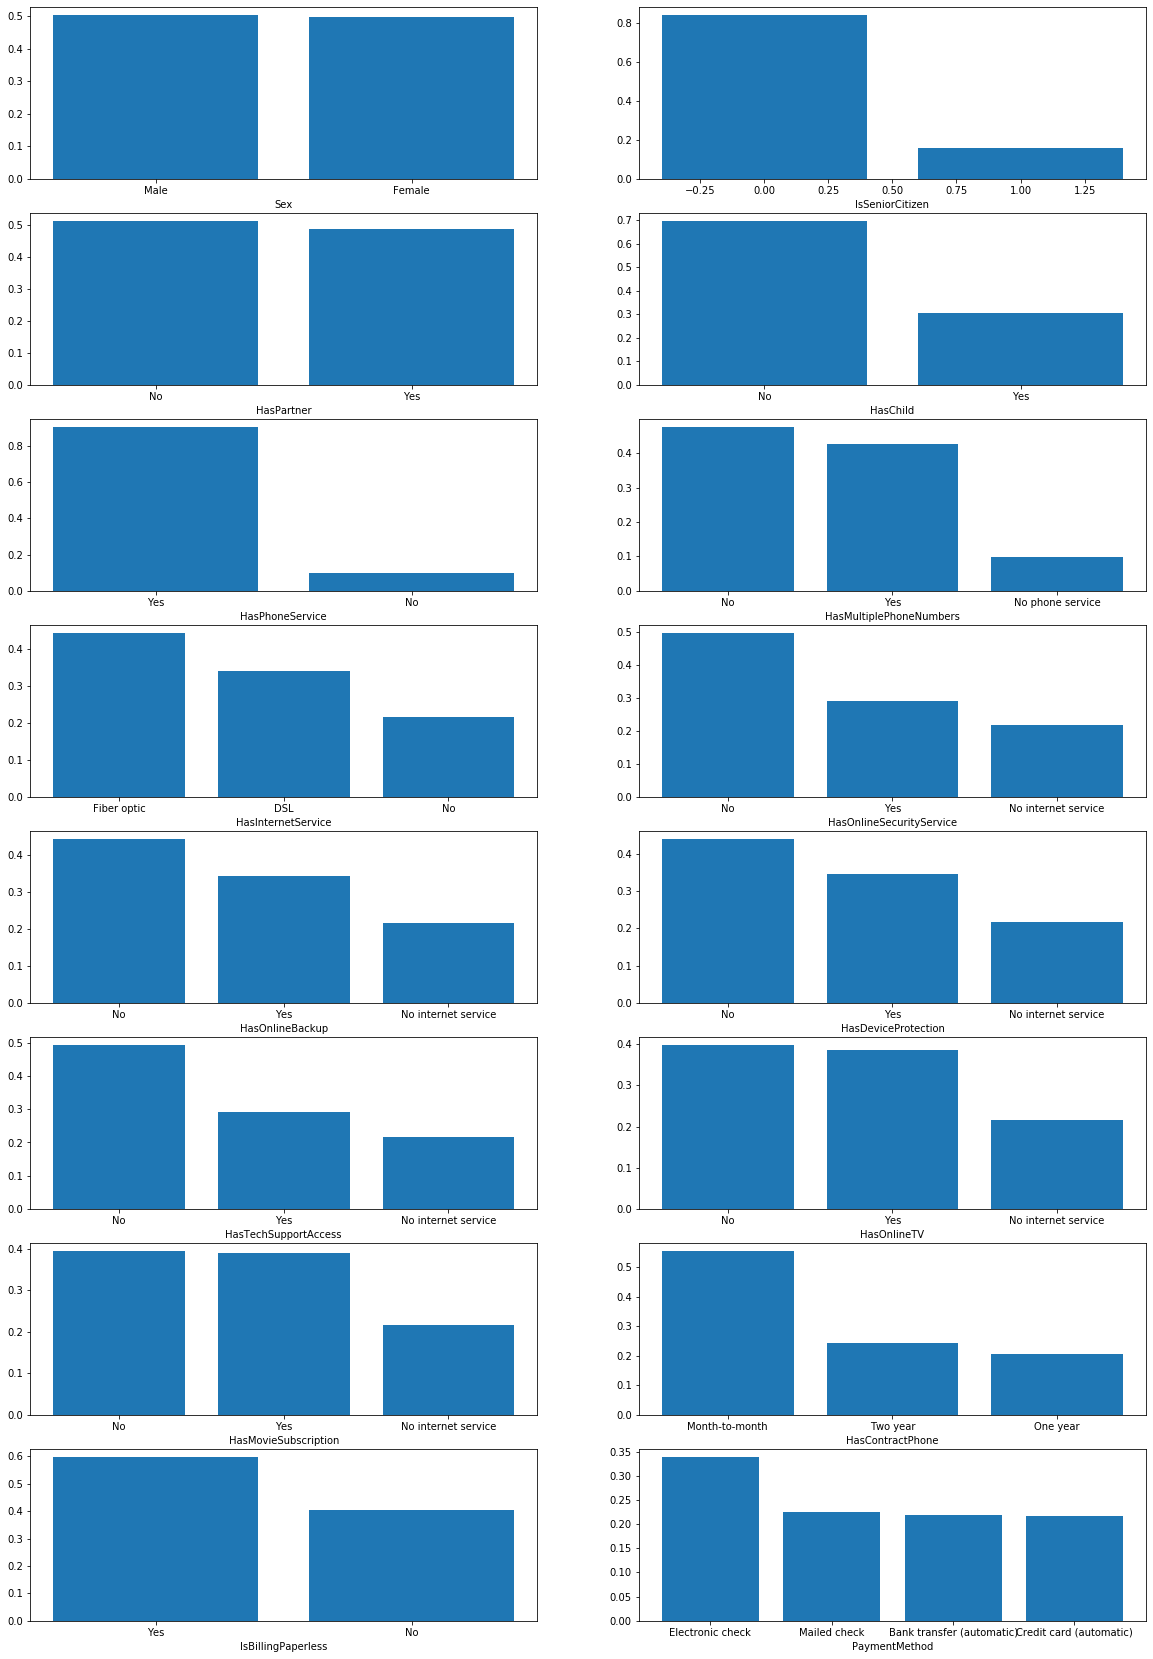

In [13]:
plt.figure(figsize=(20, 60))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols), 2, i+1)
    plt.bar(train[col].value_counts().index, train[col].value_counts(normalize=True).array)
    plt.xlabel(col)

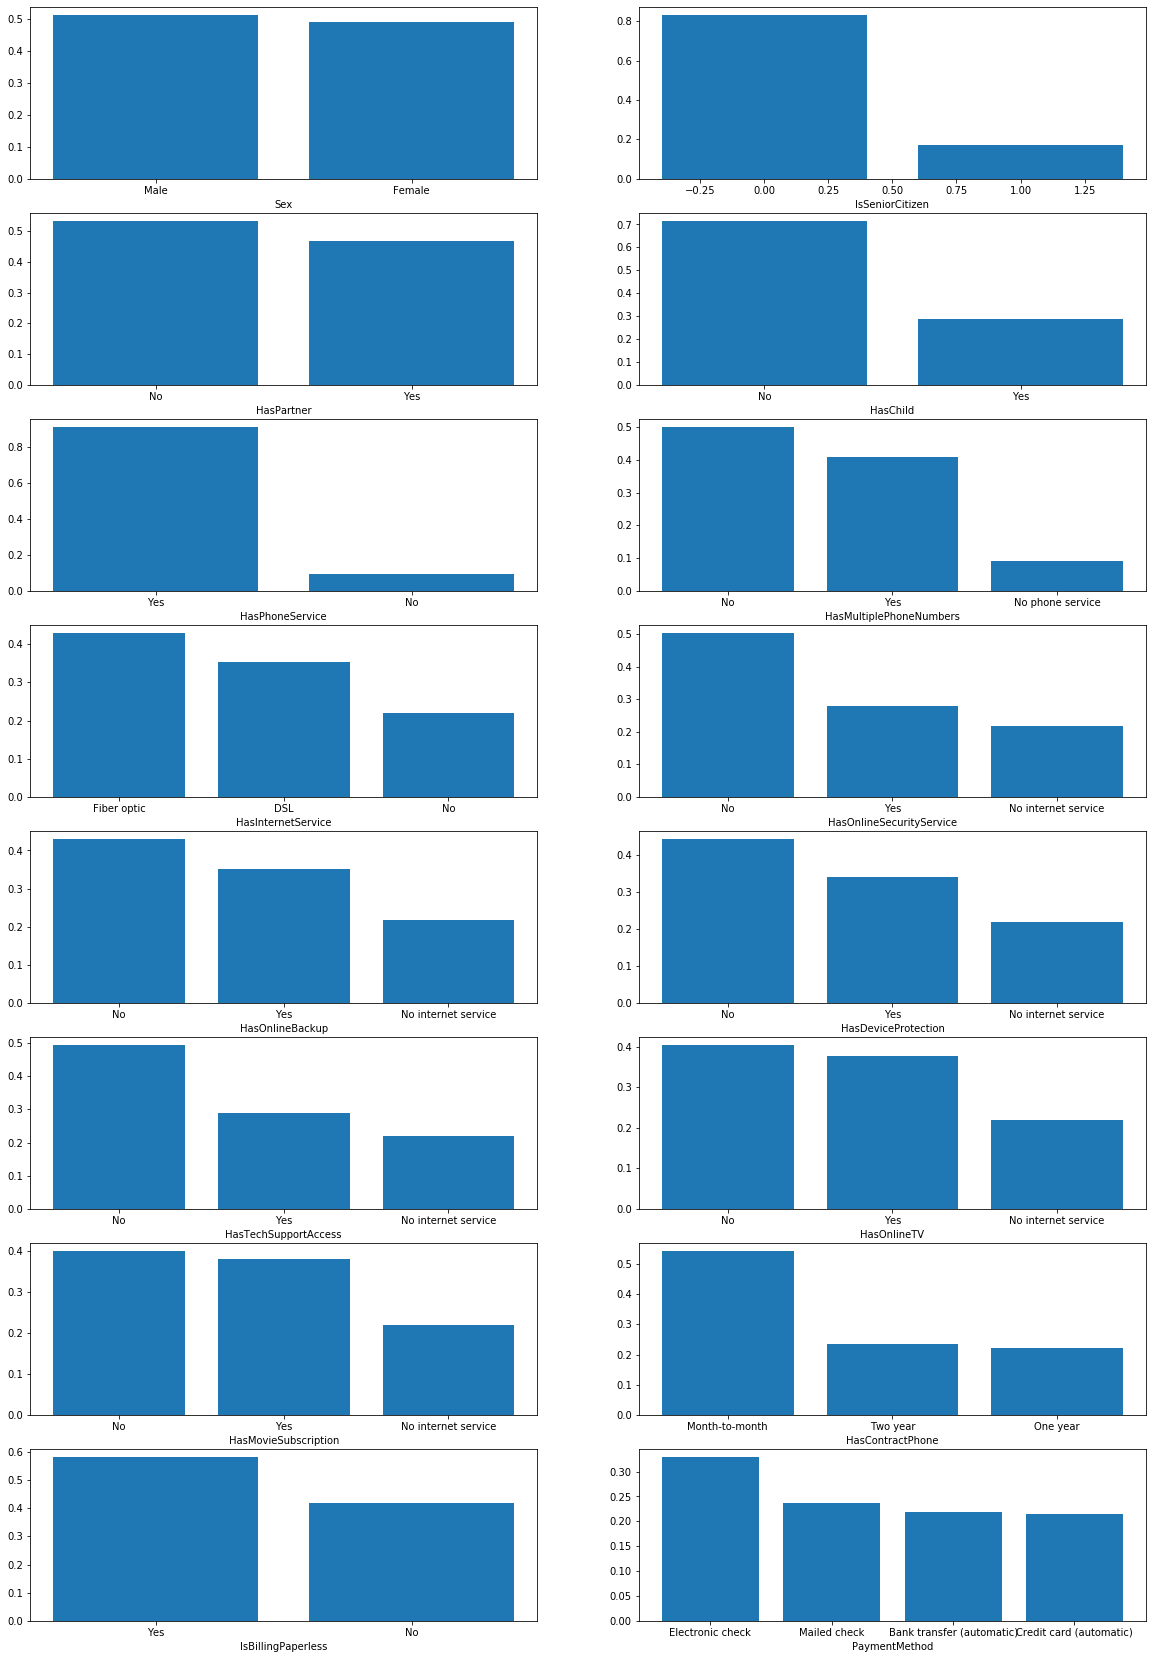

In [14]:
#Аналогично для тестовой выборки
plt.figure(figsize=(20, 60))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols), 2, i+1)
    plt.bar(test[col].value_counts().index, test[col].value_counts(normalize=True).array)
    plt.xlabel(col)

Видно, что классы не сбалансиванны: одного в ~3 раза больше, чем другого


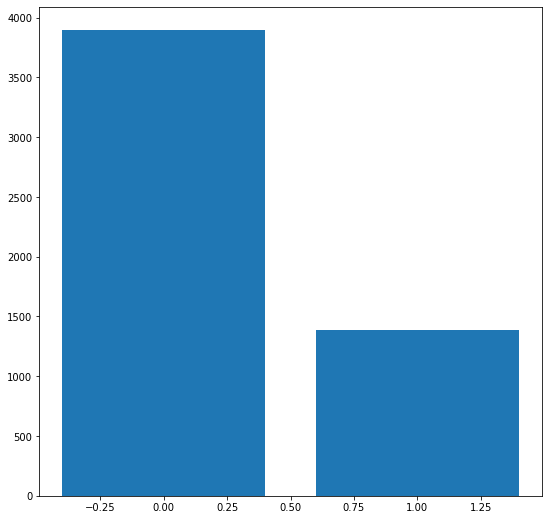

In [15]:
plt.figure(figsize=(9, 9))

plt.bar(train[target_col].value_counts().index, train[target_col].value_counts().array)
print('Видно, что классы не сбалансиванны: одного в ~3 раза больше, чем другого')
plt.show()


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [16]:
train_origin = train.copy()
test_origin = test.copy()

In [17]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [21]:
# YOUR CODE
#потом отнормируем числовые признаки
#scaler = StandardScaler()
#train_num_norm = pd.DataFrame(scaler.fit_transform(train[num_cols]))
#pd.DataFrame(data1[num_cols].to_numpy(dtype=float) - np.mean(data1[num_cols].to_numpy(dtype=float), axis=0)) / np.var(data1[num_cols].to_numpy(dtype=float))
#print(train_num_norm.shape)

#one-hot-encoding
train_cat_encoded = pd.get_dummies(train_origin[cat_cols])
#pd.DataFrame(enc.fit_transform(data1[cat_cols].to_numpy()))

test_cat_encoded = pd.get_dummies(test_origin[cat_cols])
#print(data[cat_cols].head())

X = pd.concat([train[num_cols], train_cat_encoded], axis=1)
y = train[target_col]

test = pd.concat([test[num_cols], test_cat_encoded], axis=1)
train = pd.concat([train[num_cols], pd.get_dummies(train[cat_cols])])
#print(X)
print(X.shape, y.shape, train.shape)
X.head()



(5282, 45) (5282,) (10564, 45)


E:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.349976,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.199951,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.900002,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.000000,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.450195,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [40]:
#разделим выборку чтобы найти оптимальную модель
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.7, random_state=42)

In [41]:
#отнормируем числовые признаки
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test = scaler.transform(test)
train = scaler.transform(train)

In [46]:
Cs= [100,10,1,0.1,0.01,0.001]
parameters = {'C': Cs}
#поиском по сетке найдем лучшее C и вычислим ошибку AUC_ROC
CV_model = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, cv=6, scoring='roc_auc', n_jobs=-1)
CV_model.fit(X_train, y_train)
logistic_estimator = CV_model.best_estimator_
print(np.mean(CV_model.cv_results_['mean_test_score']))
print(CV_model.best_params_)

0.8469942261309346
{'C': 10}


E:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Лучшее качество: 0.85 при C = 10


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [67]:
# YOUR CODE
from catboost import CatBoostClassifier
X_train_, X_test_, y_train_, y_test_ = train_test_split(train_origin[feature_cols], train_origin[target_col], test_size=0.3, random_state=42, stratify=train_origin[target_col])

test_ = test_origin.copy()


X_train_.head()


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
2921,1,54.50,54.500000,Female,0,No,Yes,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Electronic check
1110,65,53.50,3517.899902,Female,1,No,No,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
420,63,104.80,6597.250000,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
4273,14,80.45,1072.000000,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check
1392,31,59.95,1848.800049,Male,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check


In [68]:
cl = CatBoostClassifier()
cl.fit(X_train_, y_train_, cat_features=cat_cols, verbose=10)
print(roc_auc_score(y_test_, cl.predict_proba(X_test_)[:,1]))
print(cl.tree_count_)

Learning rate set to 0.018006
0:	learn: 0.6823028	total: 38.9ms	remaining: 38.8s
10:	learn: 0.5912167	total: 575ms	remaining: 51.7s
20:	learn: 0.5362127	total: 861ms	remaining: 40.1s
30:	learn: 0.4977822	total: 1.16s	remaining: 36.2s
40:	learn: 0.4711673	total: 1.56s	remaining: 36.6s
50:	learn: 0.4533396	total: 1.98s	remaining: 36.8s
60:	learn: 0.4400150	total: 2.29s	remaining: 35.3s
70:	learn: 0.4317067	total: 2.54s	remaining: 33.2s
80:	learn: 0.4257256	total: 2.87s	remaining: 32.5s
90:	learn: 0.4194859	total: 3.13s	remaining: 31.3s
100:	learn: 0.4148732	total: 3.51s	remaining: 31.3s
110:	learn: 0.4114064	total: 3.81s	remaining: 30.5s
120:	learn: 0.4080070	total: 4.14s	remaining: 30.1s
130:	learn: 0.4050439	total: 4.5s	remaining: 29.9s
140:	learn: 0.4022012	total: 4.84s	remaining: 29.5s
150:	learn: 0.4001180	total: 5.36s	remaining: 30.1s
160:	learn: 0.3983681	total: 5.81s	remaining: 30.3s
170:	learn: 0.3966137	total: 6.19s	remaining: 30s
180:	learn: 0.3948785	total: 6.58s	remaining: 2

In [69]:
print(cl.predict_proba(X_test_)[:,1])

[0.57024804 0.00613706 0.6057874  ... 0.29136091 0.15200498 0.65506771]


 ## Дефолтный градиентный бустинг дает точность примерно 0.83

In [70]:
lr = [0.1,0.02,0.001]
count = [10,100,1000,2000]

ans = np.zeros((len(lr), len(count)))

for i, l in enumerate(lr):
    for j, c in enumerate(count):
        cl = CatBoostClassifier(iterations=c, learning_rate=l)
        cl.fit(X_train_, y_train_, cat_features=cat_cols, verbose=10)
        print(roc_auc_score(y_test_, cl.predict_proba(X_test_)[:,1]))
        ans[i,j] = roc_auc_score(y_test_, cl.predict_proba(X_test_)[:,1])

print(ans)


0:	learn: 0.6587064	total: 18.1ms	remaining: 163ms
9:	learn: 0.5000327	total: 259ms	remaining: 0us
0.8266841725877871
0:	learn: 0.6587064	total: 18.9ms	remaining: 1.87s
10:	learn: 0.4914237	total: 217ms	remaining: 1.75s
20:	learn: 0.4384785	total: 430ms	remaining: 1.62s
30:	learn: 0.4148208	total: 793ms	remaining: 1.76s
40:	learn: 0.4040311	total: 1.04s	remaining: 1.49s
50:	learn: 0.3976341	total: 1.33s	remaining: 1.27s
60:	learn: 0.3942768	total: 1.59s	remaining: 1.02s
70:	learn: 0.3899419	total: 1.85s	remaining: 755ms
80:	learn: 0.3887858	total: 2.09s	remaining: 491ms
90:	learn: 0.3863261	total: 2.42s	remaining: 240ms
99:	learn: 0.3839891	total: 2.79s	remaining: 0us
0.8483616517351455
0:	learn: 0.6366917	total: 21.8ms	remaining: 21.8s
10:	learn: 0.4381187	total: 316ms	remaining: 28.4s
20:	learn: 0.4055340	total: 683ms	remaining: 31.8s
30:	learn: 0.3960174	total: 954ms	remaining: 29.8s
40:	learn: 0.3866943	total: 1.28s	remaining: 30s
50:	learn: 0.3840245	total: 1.5s	remaining: 27.8s
6

 ## Максимальное качество получилось для lr=0.001, count=2000 ROC-AUC=0.85

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [97]:
cl = CatBoostClassifier(iterations=2000, learning_rate=0.001)
cl.fit(X_train_, y_train_, cat_features=cat_cols, verbose=10)

0:	learn: 0.6925371	total: 31.6ms	remaining: 1m 3s
10:	learn: 0.6865371	total: 336ms	remaining: 1m
20:	learn: 0.6801669	total: 591ms	remaining: 55.7s
30:	learn: 0.6737339	total: 850ms	remaining: 54s
40:	learn: 0.6675371	total: 1.13s	remaining: 53.9s
50:	learn: 0.6616417	total: 1.4s	remaining: 53.4s
60:	learn: 0.6557758	total: 1.75s	remaining: 55.5s
70:	learn: 0.6501600	total: 2.04s	remaining: 55.4s
80:	learn: 0.6445205	total: 2.29s	remaining: 54.3s
90:	learn: 0.6390823	total: 2.6s	remaining: 54.6s
100:	learn: 0.6337046	total: 2.93s	remaining: 55.1s
110:	learn: 0.6284291	total: 3.21s	remaining: 54.5s
120:	learn: 0.6233133	total: 3.61s	remaining: 56s
130:	learn: 0.6185430	total: 3.93s	remaining: 56.1s
140:	learn: 0.6138443	total: 4.2s	remaining: 55.4s
150:	learn: 0.6094175	total: 4.45s	remaining: 54.5s
160:	learn: 0.6046766	total: 4.89s	remaining: 55.9s
170:	learn: 0.6002581	total: 5.13s	remaining: 54.9s
180:	learn: 0.5959472	total: 5.39s	remaining: 54.2s
190:	learn: 0.5916995	total: 5.8

In [ ]:
best_model = cl # какая-то предыдущая модель

In [99]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.